In [12]:

# There are many ways to detect fraud, some of which include:
# 1) Descriptive Statistics: Analyzing basic statistics like mean, median, mode, and standard deviation can 
# help identify unusual patterns in data.
# 2) Regression Analysis: Examining relationships between variables through regression analysis can highlight 
# unexpected patterns or outliers that may indicate fraudulent activities.
# 3) Cluster Analysis: Grouping similar transactions or entities together can reveal patterns and anomalies 
# within specific clusters that might be indicative of fraud.
# 4) Time Series Analysis: Examining patterns over time can help detect unusual fluctuations or trends that 
# may signal fraudulent behavior.
# 5) Machine Learning Algorithms (anomoly detection)

# The key is to establish a baseline of normal behavior and identify any deviations from that baseline.


# I just recently stumbled across another fraud detection methodology...Benford's Law...
# This statistical principle suggests that in many naturally occurring datasets, the first digit is not uniformly 
# distributed. Deviations from Benford's Law can signal potential fraud.


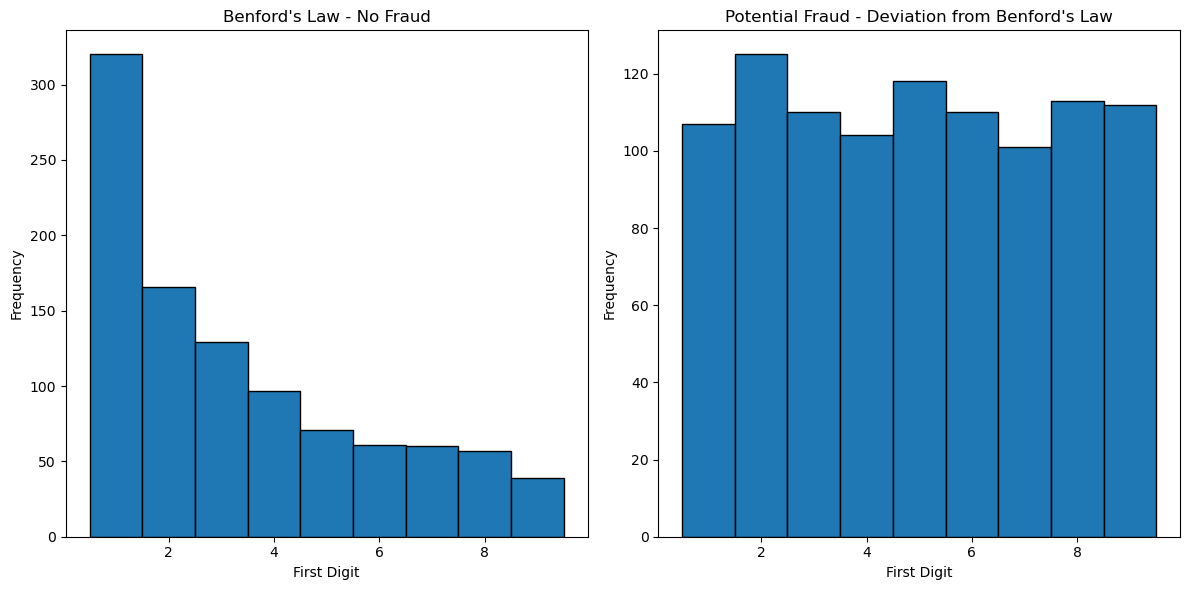

In [13]:



import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dataset following Benford's Law
def generate_benford_data(size):
    return np.random.choice(np.arange(1, 10), size=size, p=np.log10(1 + 1/np.arange(1, 10)))

# Function to generate a dataset with potential fraud
def generate_fraudulent_data(size):
    data = np.random.randint(1, 10, size=size)
    # Introduce fraud by manually changing some values
    fraud_indices = np.random.choice(size, size=int(size * 0.1), replace=False)
    data[fraud_indices] = np.random.randint(1, 10, size=len(fraud_indices))
    return data

# Set a random seed for reproducibility
np.random.seed(42)

# Generate datasets
benford_data = generate_benford_data(1000)
fraudulent_data = generate_fraudulent_data(1000)



# Plot histograms for both datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(benford_data, bins=np.arange(0.5, 10.5, 1), edgecolor='black')
plt.title("Benford's Law - No Fraud")
plt.xlabel('First Digit')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(fraudulent_data, bins=np.arange(0.5, 10.5, 1), edgecolor='black')
plt.title("Potential Fraud - Deviation from Benford's Law")
plt.xlabel('First Digit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


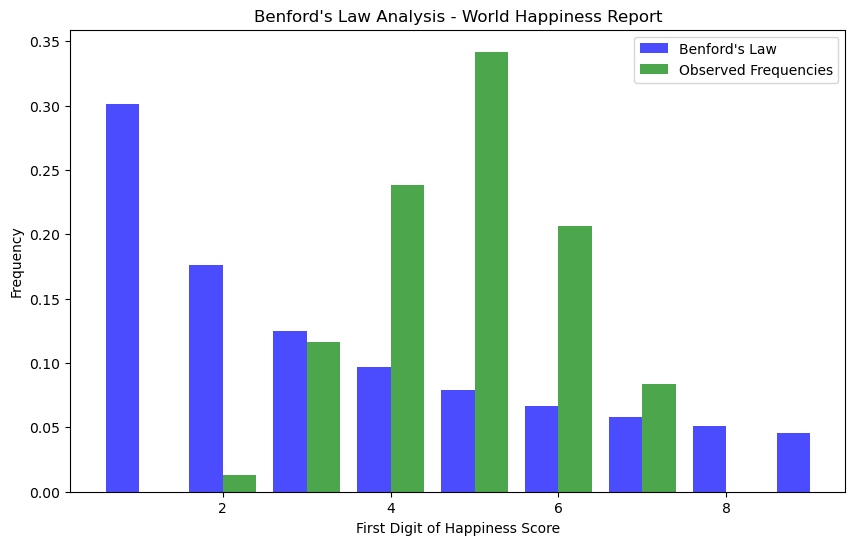

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the World Happiness Report dataset
# You can download it from https://worldhappiness.report/ed/2021/
happiness_data = pd.read_csv("C:\\Users\\happiness.csv")  # Replace with the actual file path

# Extract first digits from the happiness scores
first_digits = happiness_data['Happiness.Score'].astype(str).str[0].astype(int)

# Count the frequency of each first digit
benford_counts = pd.Series([np.log10(1 + 1/d) for d in range(1, 10)], index=range(1, 10))
observed_counts = first_digits.value_counts(normalize=True).sort_index()

# Plot the observed vs. expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(benford_counts.index - 0.2, benford_counts, width=0.4, label="Benford's Law", color='blue', alpha=0.7)
plt.bar(observed_counts.index + 0.2, observed_counts, width=0.4, label="Observed Frequencies", color='green', alpha=0.7)

plt.title("Benford's Law Analysis - World Happiness Report")
plt.xlabel('First Digit of Happiness Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:

# Expected Distribution: According to Benford's Law, the expected distribution of first digits is not uniform. 
# The digit "1" is expected to appear more frequently than "2," and so on, with "9" being the least frequent.

# Real-world Data: In real-world datasets that conform to Benford's Law, you would observe a similar distribution of 
# first digits. However, deviations from Benford's Law could indicate errors, anomalies, or potential fraud in the data.

# Context Matters: Benford's Law is more applicable to large datasets with a wide range of values. It may not be as 
# meaningful for small datasets or datasets with limited variability.    
    

In [ ]:

# In conclusion, I was wondering if this concept could be used by the IRS to potentially detect tax fraud. Below, 
# I'm creating a totally fictitious, and very synthetic, dataset of business expenses and introducing potential 
# fraud by artificially inflating some amounts. The plot compares the observed first-digit frequencies with the 
# expected frequencies based on Benford's Law. Let's run an experiment and anlyze the results.


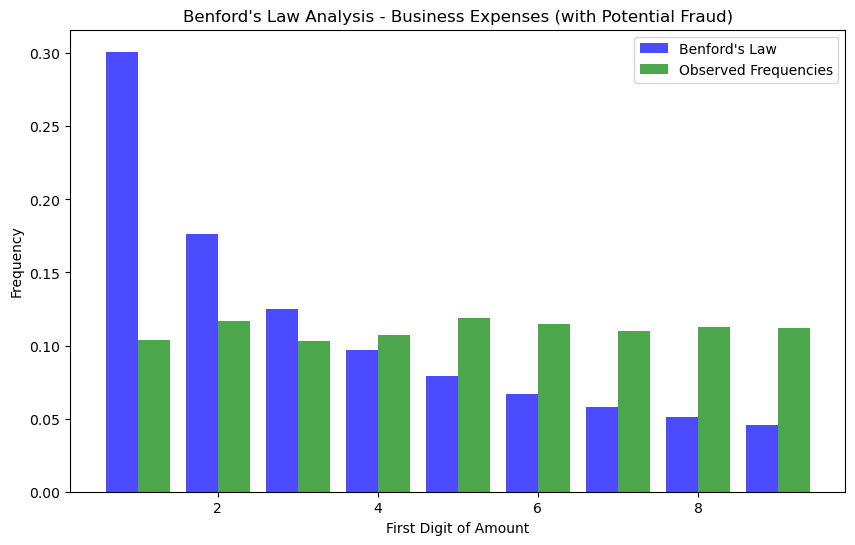

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset for business expenses
np.random.seed(42)
expenses_data = np.random.randint(1000, 100000, size=1000)

# Assume potential fraud by artificially inflating some amounts
fraud_indices = np.random.choice(1000, size=50, replace=False)
expenses_data[fraud_indices] *= 10

# Create a DataFrame
df = pd.DataFrame({'Amount': expenses_data})

# Extract first digits from the amounts
df['First Digit'] = df['Amount'].astype(str).str[0].astype(int)

# Count the frequency of each first digit
benford_counts = pd.Series([np.log10(1 + 1/d) for d in range(1, 10)], index=range(1, 10))
observed_counts = df['First Digit'].value_counts(normalize=True).sort_index()

# Plot the observed vs. expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(benford_counts.index - 0.2, benford_counts, width=0.4, label="Benford's Law", color='blue', alpha=0.7)
plt.bar(observed_counts.index + 0.2, observed_counts, width=0.4, label="Observed Frequencies", color='green', alpha=0.7)

plt.title("Benford's Law Analysis - Business Expenses (with Potential Fraud)")
plt.xlabel('First Digit of Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:

# The blue bars represent expected distributions of digits in this generic data set (let's call it natural data set).
# The green bars represent the observed distribution of first digits in the synthetic dataset. The introduction of 
# artificially inflated amounts (potential fraud) results in a deviation from Benford's Law, particularly in the 
# higher digits.

# A significant deviation from Benford's Law may serve as a red flag, prompting further investigation into the 
# specific transactions or records associated with those deviations. It doesn't prove fraud but indicates areas that 
# may warrant closer scrutiny.


In [ ]:

# Note: the 'happiness.csv' data is available here.
# https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download&select=2017.csv
